In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Train_UWu5bXk.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


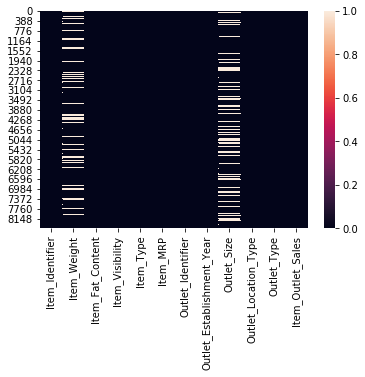

In [4]:
sns.heatmap(df.isnull())

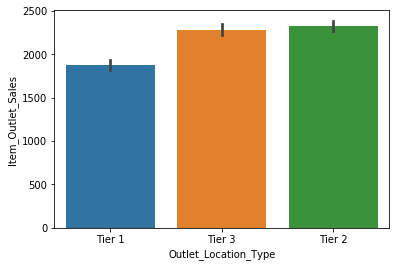

In [5]:
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales",data=df);
plt.legend(loc=8)

In [6]:
df['Item_Outlet_Sales'].mean()

2181.288913575032

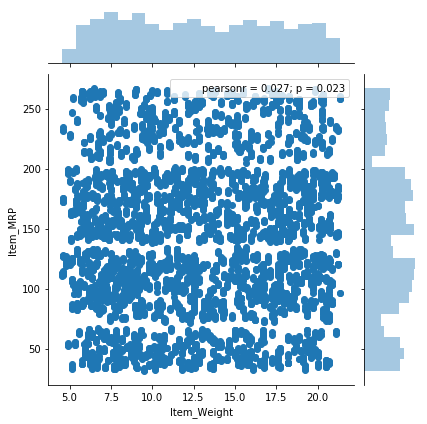

In [7]:
sns.jointplot(x=df['Item_Weight'], y=df['Item_MRP'])

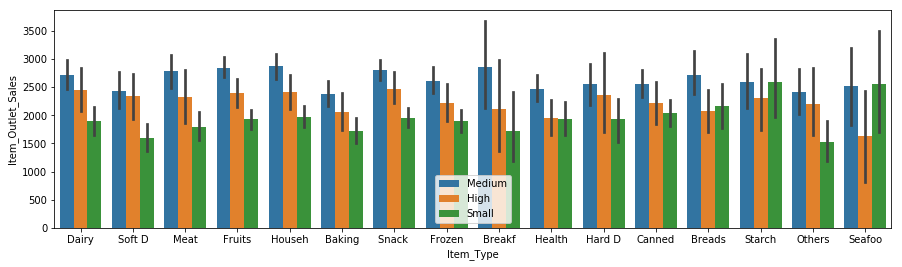

In [8]:
def first_10(x):
    return x[:6]
df['Item_Type'] = df['Item_Type'].apply(first_10)
plt.figure(figsize=(15,4))
sns.barplot(x="Item_Type", y="Item_Outlet_Sales",data=df, hue="Outlet_Size");
plt.legend(loc=8)

In [9]:
len(df[df['Outlet_Size'] == 'Medium'])

2793

In [10]:
len(df[df['Outlet_Size'] == 'Small'])

2388

In [11]:
len(df[df['Outlet_Size'] == 'High'])

932

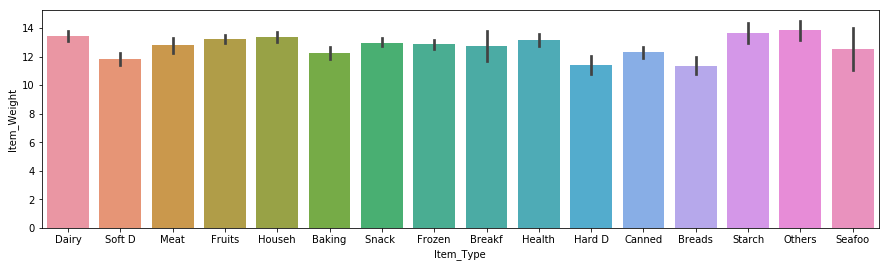

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(x="Item_Type",y="Item_Weight",data = df)

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [15]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
item_avg_weight = df.pivot_table(values='Item_Weight', index='Item_Identifier')

In [21]:
miss_bool = df['Item_Weight'].isnull() 

In [22]:
df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight['Item_Weight'][x])

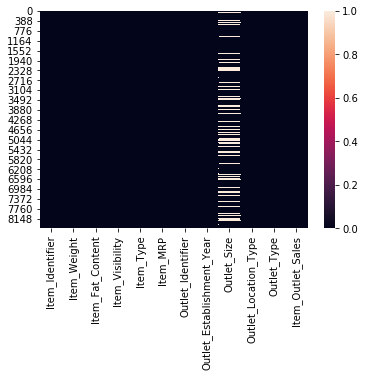

In [23]:
sns.heatmap(df.isnull())

In [24]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [25]:
# df.pivot(values='Outlet_Size', columns='Outlet_Type')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
df['Item_Fat_Content'].replace({'low fat':'Low Fat', 
                               'LF':'Low Fat',
                               'reg':'Regular'}, inplace= True)

In [27]:
# df['Item_Visibility'].replace({0:np.mean}, inplace=True)
df['Item_Visibility'].fillna(df['Item_Visibility'].mean(), inplace=True)
df['Item_Visibility'].head()

0    0.016047
1    0.019278
2    0.016760
3    0.000000
4    0.000000
Name: Item_Visibility, dtype: float64

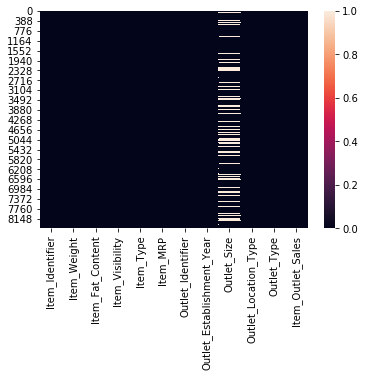

In [28]:
sns.heatmap(df.isnull())

In [29]:
df.pivot_table(values='Item_Weight', index='Item_Identifier').head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
from scipy.stats import mode

In [34]:
miss_bool = df['Outlet_Size'].isnull() 

In [35]:
sum(df['Outlet_Size'].isnull())

2410

In [36]:
# df.pivot(index='Outlet_Type', values='Outlet_Size')

In [37]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [38]:
df['Item_Type'].unique()

array(['Dairy', 'Soft D', 'Meat', 'Fruits', 'Househ', 'Baking', 'Snack ',
       'Frozen', 'Breakf', 'Health', 'Hard D', 'Canned', 'Breads',
       'Starch', 'Others', 'Seafoo'], dtype=object)

In [39]:
df['broad_categories'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [40]:
df['broad_categories'].replace({'FD':'Food Items',
                               'DR': 'Drinks',
                               'NC': 'Non-Consumed'}, inplace=True)

In [41]:
sum(df['broad_categories'].value_counts())

8523

In [42]:
# This is not working as it requires loc
# df[df['broad_categories'] == 'Non-Consumed']['Item_Fat_Content'] = 'Non-Edible'

In [43]:
df.loc[df['broad_categories'] == 'Non-Consumed', 'Item_Fat_Content'] = 'Non-Edible'

In [44]:
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,broad_categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food Items
1,DRC01,5.92,Regular,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food Items
3,FDX07,19.20,Regular,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food Items
4,NCD19,8.93,Non-Edible,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumed


In [46]:
le.fit(df['Outlet_Identifier'])

LabelEncoder()

In [47]:
df['Outlet'] = le.transform(df['Outlet_Identifier'])

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,broad_categories,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food Items,9
1,DRC01,5.92,Regular,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food Items,9
3,FDX07,19.20,Regular,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food Items,0
4,NCD19,8.93,Non-Edible,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumed,1


In [49]:
# var_mod = ['broad_categories','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type']


In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,broad_categories,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food Items,9
1,DRC01,5.92,Regular,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food Items,9
3,FDX07,19.20,Regular,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food Items,0
4,NCD19,8.93,Non-Edible,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumed,1


In [51]:
dummy_fat = pd.get_dummies(df['Item_Fat_Content'], drop_first=True)

In [52]:
df = pd.concat([df, dummy_fat], axis=1)

In [53]:
df.drop('Item_Fat_Content', axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,broad_categories,Outlet,Non-Edible,Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food Items,9,0,0
1,DRC01,5.92,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,3,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food Items,9,0,0
3,FDX07,19.20,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Food Items,0,0,1
4,NCD19,8.93,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumed,1,1,0


In [54]:
dummy_cat = pd.get_dummies(df['broad_categories'], drop_first=True)

In [55]:
df = pd.concat([df, dummy_cat], axis=1)
df.drop('broad_categories', axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9,0,0,1,0
1,DRC01,5.92,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,3,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,9,0,0,1,0
3,FDX07,19.20,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0,0,1,1,0
4,NCD19,8.93,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,1,0,0,1


In [56]:
df['Outlet_Type'].replace({'Supermarket Type3':'Supermarket Type2'},inplace=True)

In [57]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Supermarket Type2    1863
Grocery Store        1083
Name: Outlet_Type, dtype: int64

In [58]:
dummy_out = pd.get_dummies(df['Outlet_Type'], drop_first=True)

In [59]:
df = pd.concat([df, dummy_out], axis=1)
df.drop('Outlet_Type', axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed,Supermarket Type1,Supermarket Type2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,9,0,0,1,0,1,0
1,DRC01,5.92,0.019278,Soft D,48.2692,OUT018,2009,Medium,Tier 3,443.4228,3,0,1,0,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,9,0,0,1,0,1,0
3,FDX07,19.20,0.000000,Fruits,182.0950,OUT010,1998,NaN,Tier 3,732.3800,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,Househ,53.8614,OUT013,1987,High,Tier 3,994.7052,1,1,0,0,1,1,0


In [60]:
df['Item_Type'].unique()

array(['Dairy', 'Soft D', 'Meat', 'Fruits', 'Househ', 'Baking', 'Snack ',
       'Frozen', 'Breakf', 'Health', 'Hard D', 'Canned', 'Breads',
       'Starch', 'Others', 'Seafoo'], dtype=object)

In [61]:
le.fit(df['Item_Type'])

LabelEncoder()

In [62]:
df['Item_Type'] = le.transform(df['Item_Type'])

In [63]:
dummy_cit = pd.get_dummies(df['Outlet_Location_Type'], drop_first=True)

In [64]:
df = pd.concat([df, dummy_cit], axis=1)
df.drop('Outlet_Location_Type', axis=1, inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed,Supermarket Type1,Supermarket Type2,Tier 2,Tier 3
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,Medium,3735.1380,9,0,0,1,0,1,0,0,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,Medium,443.4228,3,0,1,0,0,0,1,0,1
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,Medium,2097.2700,9,0,0,1,0,1,0,0,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,NaN,732.3800,0,0,1,1,0,0,0,0,1
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,High,994.7052,1,1,0,0,1,1,0,0,1


In [65]:
le.fit(df['Outlet_Identifier'])
df['Outlet_Identifier'] = le.transform(df['Outlet_Identifier'])

In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed,Supermarket Type1,Supermarket Type2,Tier 2,Tier 3
0,FDA15,9.30,0.016047,4,249.8092,9,1999,Medium,3735.1380,9,0,0,1,0,1,0,0,0
1,DRC01,5.92,0.019278,14,48.2692,3,2009,Medium,443.4228,3,0,1,0,0,0,1,0,1
2,FDN15,17.50,0.016760,10,141.6180,9,1999,Medium,2097.2700,9,0,0,1,0,1,0,0,0
3,FDX07,19.20,0.000000,6,182.0950,0,1998,NaN,732.3800,0,0,1,1,0,0,0,0,1
4,NCD19,8.93,0.000000,9,53.8614,1,1987,High,994.7052,1,1,0,0,1,1,0,0,1


In [67]:
df.drop('Item_Identifier',axis=1, inplace=True)

In [68]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed,Supermarket Type1,Supermarket Type2,Tier 2,Tier 3
0,9.30,0.016047,4,249.8092,9,1999,Medium,3735.1380,9,0,0,1,0,1,0,0,0
1,5.92,0.019278,14,48.2692,3,2009,Medium,443.4228,3,0,1,0,0,0,1,0,1
2,17.50,0.016760,10,141.6180,9,1999,Medium,2097.2700,9,0,0,1,0,1,0,0,0
3,19.20,0.000000,6,182.0950,0,1998,NaN,732.3800,0,0,1,1,0,0,0,0,1
4,8.93,0.000000,9,53.8614,1,1987,High,994.7052,1,1,0,0,1,1,0,0,1


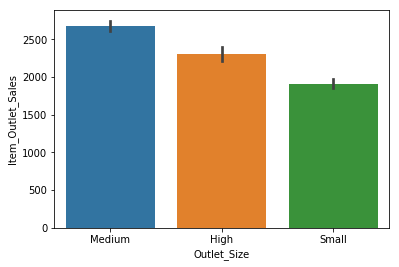

In [69]:
sns.barplot(y=df['Item_Outlet_Sales'], x=df['Outlet_Size'])

In [70]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [71]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [72]:
# df['Outlet_Size'].fillna('Medium', inplace=True)

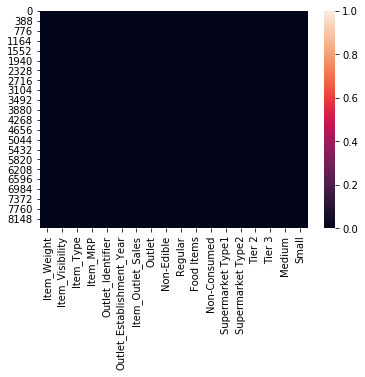

In [90]:
sns.heatmap(df.isnull())

In [74]:
dummy_size = pd.get_dummies(df['Outlet_Size'], drop_first=True)
df = pd.concat([df, dummy_size], axis=1)
df.drop('Outlet_Size', axis=1, inplace=True)
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed,Supermarket Type1,Supermarket Type2,Tier 2,Tier 3,Medium,Small
0,9.30,0.016047,4,249.8092,9,1999,3735.1380,9,0,0,1,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,3,2009,443.4228,3,0,1,0,0,0,1,0,1,1,0
2,17.50,0.016760,10,141.6180,9,1999,2097.2700,9,0,0,1,0,1,0,0,0,1,0
3,19.20,0.000000,6,182.0950,0,1998,732.3800,0,0,1,1,0,0,0,0,1,0,0
4,8.93,0.000000,9,53.8614,1,1987,994.7052,1,1,0,0,1,1,0,0,1,0,0


In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df.drop('Item_Outlet_Sales',axis=1).copy()
y = df['Item_Outlet_Sales']


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [80]:
# df.drop('Outlet_Establishment_Year',axis=1, inplace=True)

In [81]:
# lr.fit(X_train, y_train)

In [88]:
df.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,Non-Edible,Regular,Food Items,Non-Consumed,Supermarket Type1,Supermarket Type2,Tier 2,Tier 3,Medium,Small
0,9.30,0.016047,4,249.8092,9,1999,3735.1380,9,0,0,1,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,3,2009,443.4228,3,0,1,0,0,0,1,0,1,1,0
2,17.50,0.016760,10,141.6180,9,1999,2097.2700,9,0,0,1,0,1,0,0,0,1,0
3,19.20,0.000000,6,182.0950,0,1998,732.3800,0,0,1,1,0,0,0,0,1,0,0
4,8.93,0.000000,9,53.8614,1,1987,994.7052,1,1,0,0,1,1,0,0,1,0,0


In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
lr = LogisticRegression()

In [85]:
# lr.fit(X_train, y_train)

In [86]:
np.all(np.isfinite(df))

False

In [95]:
df['Item_Visibility'].mean()

0.066132028778951066

In [99]:
df['Item_Visibility'].replace({0:0.284066}, inplace=True)

In [101]:
# lr.fit(X_train, y_train)

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 8464 to 5844
Data columns (total 17 columns):
Item_Weight                  5962 non-null float64
Item_Visibility              5966 non-null float64
Item_Type                    5966 non-null int32
Item_MRP                     5966 non-null float64
Outlet_Identifier            5966 non-null int32
Outlet_Establishment_Year    5966 non-null int64
Outlet                       5966 non-null int32
Non-Edible                   5966 non-null uint8
Regular                      5966 non-null uint8
Food Items                   5966 non-null uint8
Non-Consumed                 5966 non-null uint8
Supermarket Type1            5966 non-null uint8
Supermarket Type2            5966 non-null uint8
Tier 2                       5966 non-null uint8
Tier 3                       5966 non-null uint8
Medium                       5966 non-null uint8
Small                        5966 non-null uint8
dtypes: float64(3), int32(3), int64(1), uint8(10)
m